In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

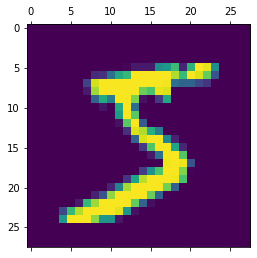

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
x_train_flattended=x_train.reshape(len(x_train),28*28)
x_test_flattended=x_test.reshape(len(x_test),28*28)

In [11]:
x_test_flattended.shape

(10000, 784)

In [12]:
x_test_flattended[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [13]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattended,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 9.6882 - accuracy: 0.8383
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 6.0687 - accuracy: 0.8806
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.6563 - accuracy: 0.8831
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4883 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.4549 - accuracy: 0.8874


In [14]:
model.evaluate(x_test_flattended,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 5.1682 - accuracy: 0.8954


[5.168220043182373, 0.8953999876976013]

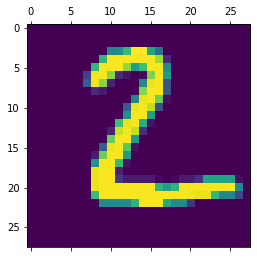

In [15]:
plt.matshow(x_test[1])

In [16]:
y_predicted=model.predict(x_test_flattended)
y_predicted[1]

array([1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.99997115, 0.        ],
      dtype=float32)

In [17]:
np.argmax(y_predicted[1])

0

In [18]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 0, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    3,    1,    1,    1,    1,    0,    0,    0],
       [   3, 1129,    3,    0,    0,    0,    0,    0,    0,    0],
       [ 133,  319,  564,    3,    9,    1,    3,    0,    0,    0],
       [ 103,  231,  337,  339,    0,    0,    0,    0,    0,    0],
       [  15,  113,   75,  198,  578,    1,    0,    0,    2,    0],
       [  90,   66,  106,  366,   63,  197,    2,    0,    2,    0],
       [ 102,   48,  567,   28,   51,   69,   93,    0,    0,    0],
       [  53,  193,  360,  373,   40,    4,    0,    5,    0,    0],
       [  21,  420,  322,  108,   22,   71,    2,    1,    7,    0],
       [  22,  158,   79,  500,  230,    4,    2,    9,    3,    2]])>

Text(69.0, 0.5, 'Truth')

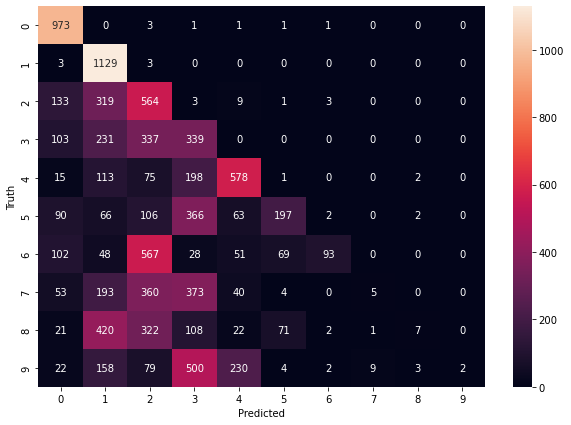

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattended,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 2.4506 - accuracy: 0.8379
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4162 - accuracy: 0.8968
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3099 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2628 - accuracy: 0.9319
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2370 - accuracy: 0.9392


In [24]:
model.evaluate(x_test_flattended,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2708 - accuracy: 0.9344


[0.27084028720855713, 0.9344000220298767]

Text(69.0, 0.5, 'Truth')

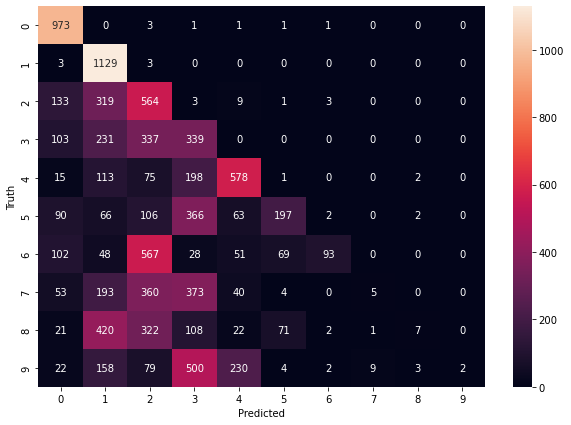

In [25]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 2.5665 - accuracy: 0.8420
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4297 - accuracy: 0.8995
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3204 - accuracy: 0.9189
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2575 - accuracy: 0.9356
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2341 - accuracy: 0.9416
